# Importing required packages

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
import xgboost as xgb

# Read data

In [2]:
data = pd.read_csv('bankruptcy.csv')
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [3]:
data.shape

(10503, 65)

In [4]:
data_description = data.describe() 
data_description

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000


# Replace correct values for class column

In [5]:
data['class']

0        b'0'
1        b'0'
2        b'0'
3        b'0'
4        b'0'
         ... 
10498    b'1'
10499    b'1'
10500    b'1'
10501    b'1'
10502    b'1'
Name: class, Length: 10503, dtype: object

In [6]:
data = data.replace(["b'0'", "b'1'"], [0,1])

# Check null/NA Values

In [7]:
data.isnull().sum().nlargest(10)

Attr37    4736
Attr21     807
Attr27     715
Attr60     592
Attr45     591
Attr28     228
Attr53     228
Attr54     228
Attr64     228
Attr24     227
dtype: int64

### Attr37 has a very high ~43% missing rate. Hence we will remove this feature

In [8]:
data.drop("Attr37", axis = 1, inplace = True)

# Split data in features and labels

In [9]:
features = data.drop('class', axis = 1)
labels = data['class']

## Create a hold out validation set to use after model selection 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_holdout_test, y_train, y_holdout_test = train_test_split(features, labels, 
                                                                    test_size=0.20, random_state=42)

In [11]:
X_train.shape

(8402, 63)

In [12]:
y_train.shape

(8402,)

In [13]:
X_holdout_test.shape

(2101, 63)

In [14]:
y_holdout_test.shape

(2101,)

# Impute Missing Values using KNNImputer

In [15]:
def impute_vals(df):
    imputer = KNNImputer(n_neighbors=10, weights="uniform")
    imputed_data = imputer.fit_transform(df)
    return(pd.DataFrame(imputed_data, index=df.index, columns=df.columns))

In [16]:
X_train = impute_vals(X_train)
X_holdout_test = impute_vals(X_holdout_test)

# Remove outliers from training data

In [17]:
def remove_outliers(X, y):
    X_without_outliers = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
    rows_to_remove = set(X.index) - set(X_without_outliers.index)
    y_filtered = y.drop(index = rows_to_remove)
    return(X_without_outliers, y_filtered)

In [18]:
X_train, y_train = remove_outliers(X_train, y_train)

# Check if the dataset is balanced 

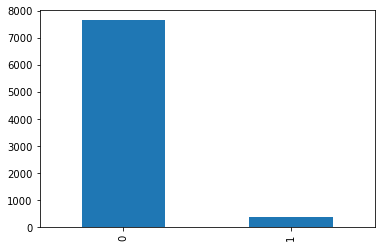

In [19]:
pd.Series(y_train).value_counts().plot(kind='bar')

### The data set is not balanced, observartions of class 1, i.e bankruptcy is significantly lesser than class 0.

### Use SMOTE before training and validation in the pipelines to oversample the minority class

# Model Selection Using AUC-ROC score

In [21]:
X_tv, X_test, y_tv, y_test = train_test_split(X_train, y_train)

models = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 100]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(max_iter=10000),
        'params': {
            'C': np.logspace(-2, 0, 10)
        }
    },
    {
        'name': 'XGBoost Classifier',
        'model': xgb.XGBClassifier(),
        'params': {
            'max_depth': [3, 10, 15],
            'n_estimators': [10, 100]
        }
    }
]

kfold = KFold(n_splits=5, shuffle=True)

for m in models:
    pipeline = make_pipeline(
        SMOTE(),
        StandardScaler(),
        GridSearchCV(
            estimator=m['model'],
            param_grid=m['params'],
            scoring='roc_auc',
            n_jobs=-1,
            cv=kfold
        )
    )
    
    pipeline.fit(X_tv, y_tv)
    predictions = pipeline.predict_proba(X_test)[:, 1]
    m['score'] = roc_auc_score(y_test, predictions, average='micro')
    m['pipeline'] = pipeline

In [22]:
for m in models:
    print(f"Model: {m['name']}: score = {m['score']:.4f}")

Model: Random Forest: score = 0.8219
Model: Logistic Regression: score = 0.7882
Model: XGBoost Classifier: score = 0.8615


# Selecting the best model 

In [23]:
selected_model = max(models, key=lambda x: x['score'])['pipeline']
pipeline = make_pipeline(SMOTE(), StandardScaler(), selected_model)

## How does the selected model perform on holdout data

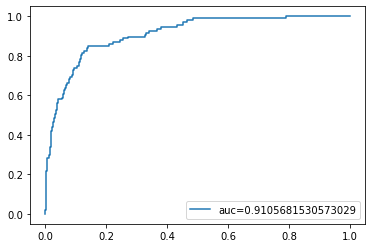

In [24]:
pipeline.fit(X_train, y_train)
predicitions = pipeline.predict_proba(X_holdout_test)
predicitions_probs = predicitions[:, 1]

fpr, tpr, _ = roc_curve(y_holdout_test, predicitions_probs)
auc = roc_auc_score(y_holdout_test, predicitions_probs)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### The selected model XGBoost performs better in the holdout dataset

# Feature Importance

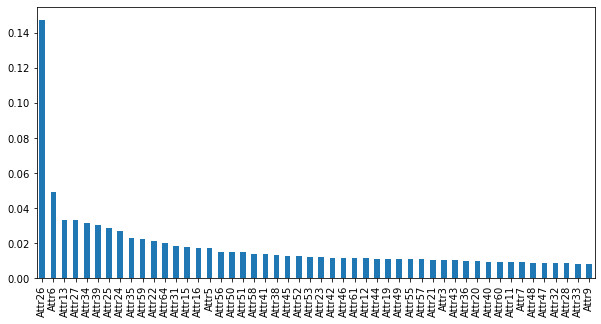

In [27]:
plt.subplots(figsize = (10,5))
feature_importances_pipeline = pipeline.steps[2][1].steps[2][1].best_estimator_.feature_importances_
feature_importances = pd.Series(feature_importances_pipeline, index=X_train.columns)
feature_importances.sort_values(ascending=False,inplace=True)
feature_importances.nlargest(50).plot(kind='bar')

### Parsing the meaning of features from text file

In [28]:
features_dict = {}
with open("features.txt") as f:
    for line in f:
        feature_key = line.split(" ", 1)[0].replace("X", "Attr")
        feature_name = line.split(" ", 1)[1]
        features_dict[feature_key] = feature_name

## Getting the meanings of top n features 

In [29]:
n_top_features = 15

top_n_feature_names = [features_dict[f].strip() for f in feature_importances.nlargest(n_top_features).index]
top_n_features = dict(zip(top_n_feature_names, feature_importances.nlargest(n_top_features)))

counter = 1
for i in top_n_features.keys():
    print(f"{counter}. {i}: {top_n_features[i]:.4f}")
    counter += 1

1. (net profit + depreciation) / total liabilities: 0.1475
2. retained earnings / total assets: 0.0493
3. (gross profit + depreciation) / sales: 0.0335
4. profit on operating activities / financial expenses: 0.0335
5. operating expenses / total liabilities: 0.0313
6. profit on sales / sales: 0.0306
7. (equity - share capital) / total assets: 0.0288
8. gross profit (in 3 years) / total assets: 0.0268
9. profit on sales / total assets: 0.0228
10. long-term liabilities / equity: 0.0225
11. profit on operating activities / total assets: 0.0215
12. sales / fixed assets: 0.0203
13. (gross profit + interest) / sales: 0.0187
14. (total liabilities * 365) / (gross profit + depreciation): 0.0179
15. (gross profit + depreciation) / total liabilities: 0.0174


# Correlation in top features

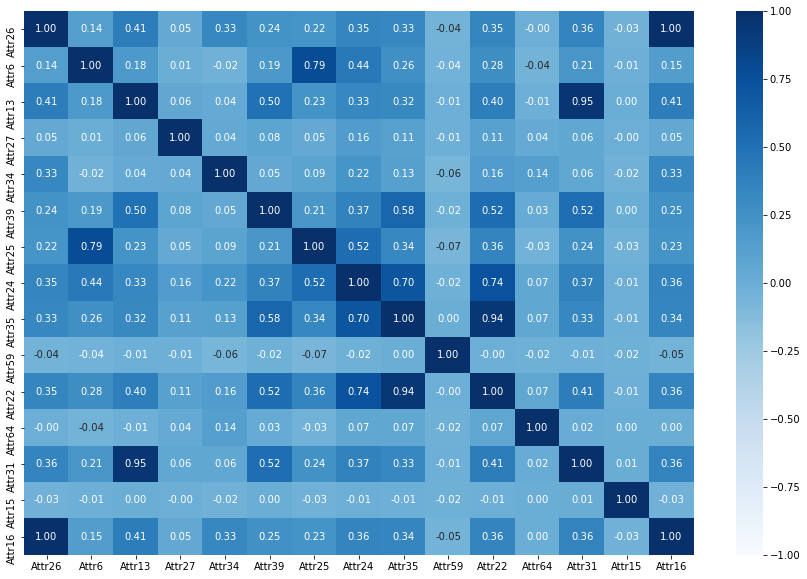

In [30]:
corr = X_train[feature_importances.nlargest(15).index].sample(1000).corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, vmax = 1, vmin = -1,
            yticklabels=corr.columns, annot=True, cmap='Blues', fmt='.2f')

## Remove correlated columns

In [31]:
upper_tri = corr.abs().where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
correlated_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.65)]
print(f"removing correlated columns : {correlated_cols}")

important_columns = list(set(feature_importances.nlargest(n_top_features).index) - set(correlated_cols))

removing correlated columns : ['Attr25', 'Attr35', 'Attr22', 'Attr31', 'Attr16']


In [32]:
print(f"no. of important columns are {len(important_columns)} : \n{important_columns}")

no. of important columns are 10 : 
['Attr64', 'Attr15', 'Attr59', 'Attr39', 'Attr27', 'Attr24', 'Attr26', 'Attr34', 'Attr6', 'Attr13']


# Principal Component Analysis

In [33]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train[important_columns])

print(f"Two principal components can explain {pca.explained_variance_ratio_.sum() * 100:.3f}% of the variance")

Two principal components can explain 99.999% of the variance


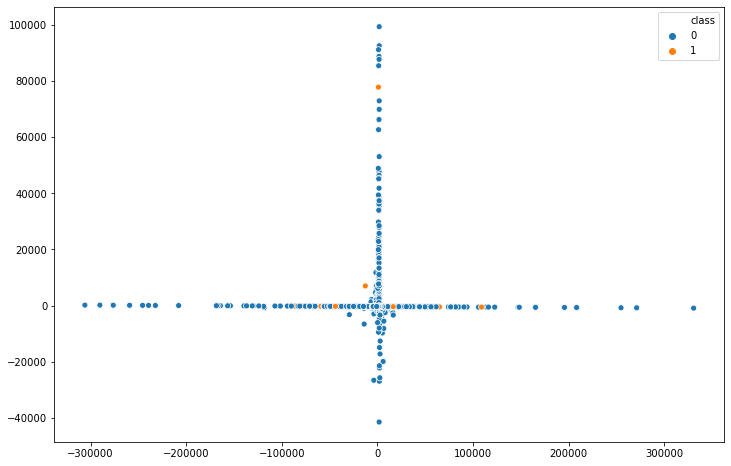

In [34]:
Wx, Wy = list(zip(*pca_result))
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(Wx, Wy, hue=y_train, legend='full');

In [35]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train[important_columns])

print(f"Three principal components can explain {pca.explained_variance_ratio_.sum() * 100:.3f}% of the variance")


Three principal components can explain 100.000% of the variance


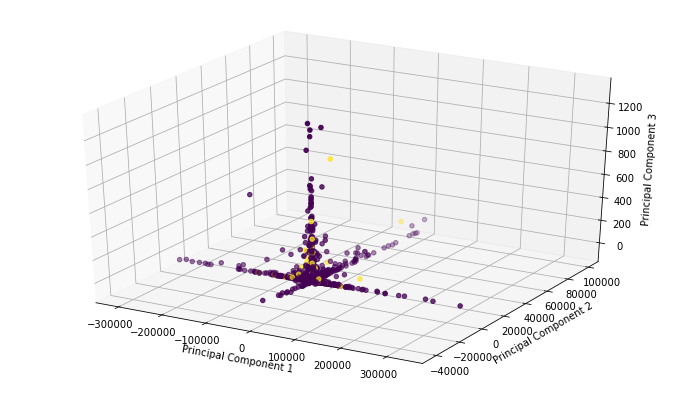

In [36]:
ax = plt.figure(figsize=(12,7)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train
)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## Performance of XGBoost on top important features

In [ ]:
pipeline.fit(X_train[important_columns], y_train)
top_n_model_predicitions = pipeline.predict_proba(X_holdout_test[important_columns])
top_n_model_predicitions_probs = top_n_model_predicitions[:, 1]

fpr, tpr, _ = roc_curve(y_holdout_test, top_n_model_predicitions_probs)
auc = roc_auc_score(y_holdout_test, top_n_model_predicitions_probs)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()